In [10]:
import pandas as pd

In [11]:
df=pd.read_csv("data.csv")
df["cumsum_profit3"]=df["profit3"].cumsum()
df["cumsum_profit2"]=df["profit2"].cumsum()
df["cumsum_profit1"]=df["profit1"].cumsum()


df["delta_profit3"]=df["profit3"].diff()
df["SMA_profit3_1000"]=df["profit3"].rolling(1000).mean()
df["SMA_profit2_1000"]=df["profit2"].rolling(1000).mean()
df["SMA_profit1_1000"]=df["profit1"].rolling(1000).mean()

df

,stato0,stato1,profit1,profit2,profit3,price_chosen,cumsum_profit3,cumsum_profit2,cumsum_profit1,delta_profit3,SMA_profit3_1000,SMA_profit2_1000,SMA_profit1_1000
0,4.0,2.0,50000.0,50000.0,50000.000000,379.031382,5.000000e+04,5.000000e+04,5.000000e+04,NaN,NaN,NaN,NaN
1,0.0,8.0,-11289.0,-1840030.0,50000.000000,631.849895,1.000000e+05,-1.790030e+06,3.871100e+04,0.000000e+00,NaN,NaN,NaN
2,0.0,1.0,-37097.0,-397008.0,-81365.209166,317.307269,1.863479e+04,-2.187038e+06,1.614000e+03,-1.313652e+05,NaN,NaN,NaN
3,1.0,8.0,-346434.0,-1710720.0,36731.152210,631.849895,5.536594e+04,-3.897758e+06,-3.448200e+05,1.180964e+05,NaN,NaN,NaN
4,0.0,0.0,-539604.0,-642639.0,50000.000000,523.221679,1.053659e+05,-4.540397e+06,-8.844240e+05,1.326885e+04,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9.0,7.0,-3286481.0,-1850337.0,-191153.640234,705.127603,-1.908942e+07,-1.430004e+10,-1.445123e+10,-2.411536e+05,-3935.052035,-1456289.324,-1431599.149
9996,6.0,6.0,-1982658.0,-1150248.0,50000.000000,475.923108,-1.903942e+07,-1.430119e+10,-1.445321e+10,2.411536e+05,-3555.132396,-1455807.732,-1431977.680
9997,0.0,5.0,-239514.0,-1379273.0,50000.000000,475.923108,-1.898942e+07,-1.430257e+10,-1.445345e+10,0.000000e+00,-3354.171029,-1455676.799,-1429330.468
9998,8.0,7.0,-2417256.0,-2678892.0,50000.000000,475.923108,-1.893942e+07,-1.430525e+10,-1.445587e+10,0.000000e+00,-3354.171029,-1456777.135,-1431666.433


<Axes: >

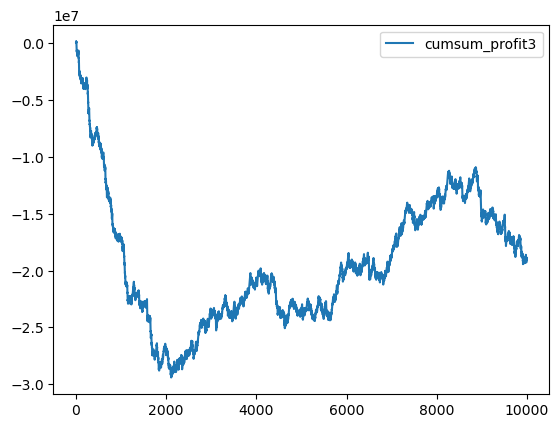

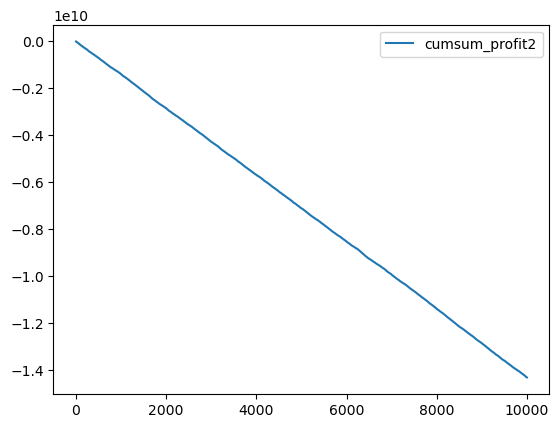

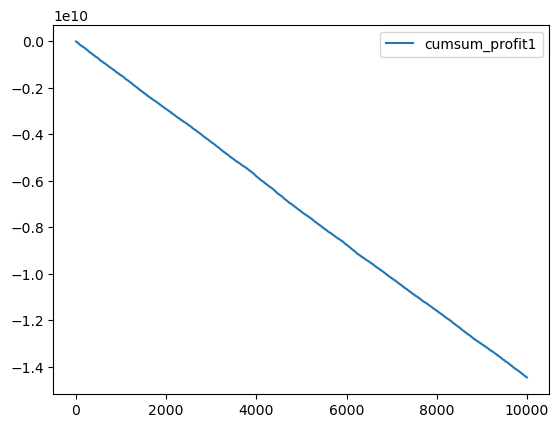

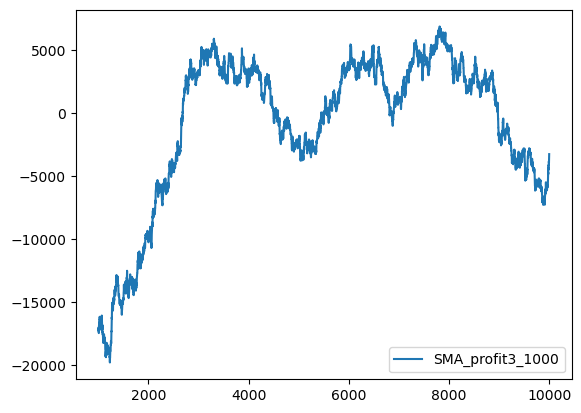

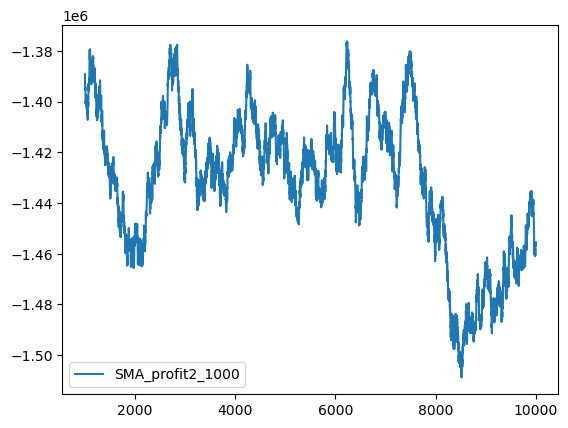

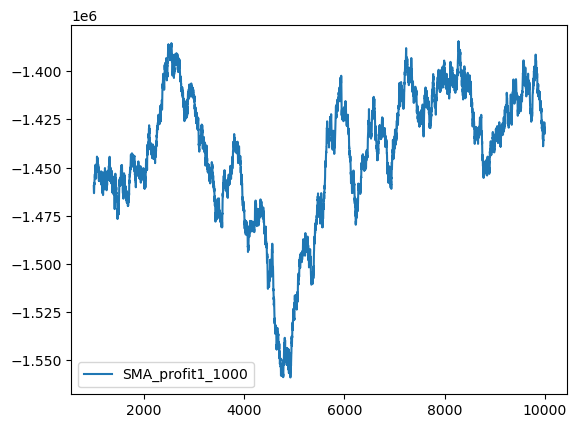

In [12]:



df.plot(y="cumsum_profit3")
df.plot(y="cumsum_profit2")
df.plot(y="cumsum_profit1")

df.plot(y="SMA_profit3_1000")
df.plot(y="SMA_profit2_1000")
df.plot(y="SMA_profit1_1000")

#plot the derivative of cumsum_profit3